## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

## Loading the Dataset

In [11]:
df = pd.read_csv('startup_funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Basic Overview of Data

This dataset has funding information of the Indian startups from January 2015 to January 2020. It includes columns as follows :

1) **Sr No** : Serial number of all the entries.

2) **Date dd/mm/yyyy** : Date of funding.

3) **Startup Name** : Name of the startup which got funded.

4) **Industry Vertical** : Industry to which the startup belongs.

5) **SubVertical** : Sub-category of the industry types.

6) **City Location** : City at which the Startup is based.

7) **Investors Name** : Name of the investors involved in the funding round.

8) **InvestmentnType** : Type of investment on the startup.

9) **Amount in USD** : The amount funded by the investor to statup in US Dollars.

10) **Remarks** : Extra remarks (if any).

In [12]:
df.shape

(3044, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [14]:
df.head(2)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


### Dropping Remarks because it has only 10% values

In [15]:
df.drop(columns=['Remarks'], inplace=True)

### Renaming Columns for better understanding

In [16]:
df.rename(columns={
    'Date dd/mm/yyyy' : 'date',
    'Startup Name' : 'startup',
    'Industry Vertical' : 'vertical',
    'SubVertical' : 'subvertical', 
    'City  Location' : 'city',
    'Investors Name' : 'investors',
    'InvestmentnType' : 'round',
    'Amount in USD' : 'amount'
}, inplace=True)

In [17]:
df.head(2)

,Sr No,date,startup,vertical,subvertical,city,investors,round,amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


## Handling Missing Values

In [18]:
df.isnull().sum()

Sr No            0
date             0
startup          0
vertical       171
subvertical    936
city           180
investors       24
round            4
amount         960
dtype: int64

Dropping the rows having NA values in investors and round column

In [20]:
df.dropna(subset=['investors', 'round'], inplace=True)

Handling the Datatype of date column

In [28]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')
df['date'] = df['date'].str.replace('01/07/015','01/07/2015')
df['date'] = df['date'].str.replace('12/05.2015','12/05/2015')
df['date'] = df['date'].str.replace('13/04.2015','13/04/2015')
df['date'] = df['date'].str.replace('15/01.2015','15/01/2015')
df['date'] = df['date'].str.replace('22/01//2015','22/01/2015')
df['date'] = df['date'].str.replace('\\\\xc2\\\\xa010/7/2015','10/07/2015')

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

Adding additional columns based on date column

In [33]:
df["day"]=df.date.dt.day
df["month"]=df.date.dt.month
df["year"]=df.date.dt.year

### Setting Sr No column as index

In [37]:
df.set_index('Sr No',inplace=True)

### Handling values of startup name column

In [38]:
df[df["startup"].str.contains("CarDekho",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",6,12,2019
45,2019-08-01,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"2,00,00,000",1,8,2019
117,2019-01-03,CarDekho,Automobile,Online Marketplace,Jaipur,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",Series C,"11,00,00,000",3,1,2019
2796,2015-05-22,CarDekho,Online Car Portal,NaN,Jaipur,HDFC Bank,Private Equity,NaN,22,5,2015
2954,2015-02-09,CarDekho.com,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,9,2,2015
3038,2015-01-27,CarDekho.com,NaN,NaN,NaN,"Hillhouse Capital, Tybourne Capital",Private Equity,"5,00,00,000",27,1,2015


In [40]:
df["startup"] = df["startup"].str.replace("CarDekho.com","CarDekho")

In [42]:
df[df["startup"].str.contains("Ola",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
65,2019-07-03,Ola Cabs,Transport,Cabs,Kormangala,"DIG Investment Ab, Deshe Holdings, Samih Touka...",Series J,"10,00,000",3,7,2019
90,2019-05-06,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,undisclosed,6,5,2019
268,2018-05-22,Vola,Finance,Micro Lending Platform,Bengaluru,Credika and unnamed angel investors,Seed/ Angel Funding,"5,00,000",22,5,2018
368,2018-02-13,holachef,Food and Beverages,Online Food Delivery,Mumbai,Ashok Kumar Gajera,Seed / Angle Funding,"3,11,200",13,2,2018
524,2017-10-03,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity,"11,00,00,000",3,10,2017
571,2017-10-28,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,ANI Technologies Pvt. Ltd,Private Equity,"77,00,000",28,10,2017
654,2017-08-11,Ola Cabs,Consumer Internet,App based cab aggregation Service,Gurgaon,Tekne Capital Management,Private Equity,"3,60,00,000",11,8,2017
749,2017-06-14,Ola,Consumer Internet,Cab Aggregation App,Bangalore,Tekne Capital Management LLC,Private Equity,"5,00,00,000",14,6,2017
792,2017-05-03,Ola,Consumer Internet,Cab Aggregation App,Bangalore,"Falcon Edge Capital,\\xc2\\xa0 Capital Advisers",Private Equity,"10,45,00,000",3,5,2017


In [43]:
df["startup"]=df["startup"].replace({"Ola Cabs":"Ola","Olacabs":"Ola","Ola Electric":"Ola"})

In [44]:
df[df["startup"].str.contains("Oyo",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
116,2018-02-14,OyoRooms,Hospitality,Budget Rooms,Gurgaon,DiDi Chuxing,Equity,"10,00,00,000",14,2,2018
587,2017-09-07,OYO Rooms,Consumer Internet,Branded budget hotels marketplace,Gurgaon,"SoftBank Group, Sequoia Capital India, Lightsp...",Private Equity,"25,00,00,000",7,9,2017
601,2017-09-13,OYO Rooms,Consumer Internet,udget hotel marketplace,Gurgaon,China Lodging Group,Private Equity,"1,00,00,000",13,9,2017
907,2017-04-24,Oyo Rooms,Consumer Internet,Branded Budget Hotels Aggregator,Gurgaon,"SoftBank Vision Fund, Lightspeed Venture Partn...",Private Equity,"25,00,00,000",24,4,2017
1236,2016-11-24,FroyoFit,Consumer Internet,Fitness Discovery Platform,Indore,Dr. Pooja Gandhi,Seed Funding,NaN,24,11,2016
1447,2016-08-16,OyoRooms,Consumer Internet,Budget Hotels Aggregator,New Delhi,SoftBank Group,Private Equity,"6,20,00,000",16,8,2016
1761,2016-04-11,Oyo,Consumer Internet,Online Branded Budget Room Booking Service,New Delhi,"Softbank, Sequoia Capital, Lightspeed Venture ...",Private Equity,"10,00,00,000",11,4,2016
1791,2016-04-19,OYOfit,Consumer Internet,Fitness Services Aggregator platform,Bangalore,RN Agarwal,Seed Funding,NaN,19,4,2016
2477,2015-08-03,Oyorooms,Budget Hotel accommodation brand,NaN,New Delhi,"SoftBank Group, Greenoaks Capital, Sequoia Cap...",Private Equity,"10,00,00,000",3,8,2015


In [45]:
df["startup"]=df["startup"].replace({"OYO Rooms":"OYO","Oyo Rooms":"OYO","Oyo":"OYO","OyoRooms":"OYO","Oyorooms":"OYO"})

In [46]:
df[df["startup"].str.contains("Rapido",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,90,00,00,000",27,8,2019
504,2017-11-21,Rapido,Technology,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund, Aravind Sanka",Seed/Angel Funding,"3,29,230",21,11,2017
622,2017-09-25,Rapido,Consumer Internet,Bike Aggregator Mobile App,Bangalore,Battery Road Digital Holdings LLC,Seed Funding,"4,22,000",25,9,2017
1781,2016-04-18,Rapido,Consumer Internet,Bike Aggregator App,Bangalore,"Pawan Munjal, AdvantEdge Partners, Astarc Vent...",Private Equity,NaN,18,4,2016


In [47]:
df["startup"]=df["startup"].replace({"Rapido Bike Taxi":"Rapido"})

In [49]:
df[df["startup"].str.contains(r"xe2\\x80\\x99s",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
1399,2016-09-26,Let\xe2\x80\x99s Barter,Consumer Internet,Goods & Services Barter Platform,New Delhi,Scale Ventures Funds,Seed Funding,NaN,26,9,2016


In [50]:
df["startup"]=df["startup"].apply(lambda x:x.replace(r"\xe2\x80\x99",""))

In [51]:
df[df["startup"].str.contains("BYJU",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",9,1,2020
68,2019-07-10,"""BYJU\\'S""",EdTech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,"15,00,00,000",10,7,2019
713,2017-07-25,Byju\\xe2\\x80\\x99s,Consumer Internet,Mobile Learning App,Bangalore,Tencent Holdings,Private Equity,"3,50,00,000",25,7,2017
984,2017-03-29,Byju\\xe2\\x80\\x99s,Consumer Internet,Online Education Platform,Bangalore,Verlinvest,Private Equity,NaN,29,3,2017
1165,2016-12-20,BYJU\\xe2\\x80\\x99s,Consumer Internet,Online Learning platform,Bangalore,International Financial Corporation,Private Equity,"1,50,00,000",20,12,2016
1357,2016-09-09,Byju\\xe2\\x80\\x99s,Education,Online Learning App,Bangalore,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,"5,00,00,000",9,9,2016
1881,2016-03-22,Byju\\xe2\\x80\\x99s,Consumer Internet,Educational Video Content Creator,Bangalore,"Sequoia India, Sofina",Private Equity,"7,50,00,000",22,3,2016


In [144]:
df[df["startup"].str.contains("byju",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
1,2020-01-09,BYJU’S,e-tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00,9,1,2020,BYJU’S
68,2019-07-10,"""BYJU\\'S""",edtech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,1237.50,10,7,2019,"""BYJU\\'S"""
713,2017-07-25,Byju's,consumer internet,Mobile Learning App,Bengaluru,Tencent Holdings,Private Equity,288.75,25,7,2017,Byju\\xe2\\x80\\x99s
984,2017-03-29,Byju's,consumer internet,Online Education Platform,Bengaluru,Verlinvest,Private Equity,0.00,29,3,2017,Byju\\xe2\\x80\\x99s
1165,2016-12-20,BYJU's,consumer internet,Online Learning platform,Bengaluru,International Financial Corporation,Private Equity,123.75,20,12,2016,BYJU\\xe2\\x80\\x99s
1357,2016-09-09,Byju's,education,Online Learning App,Bengaluru,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,412.50,9,9,2016,Byju\\xe2\\x80\\x99s
1881,2016-03-22,Byju's,consumer internet,Educational Video Content Creator,Bengaluru,"Sequoia India, Sofina",Private Equity,618.75,22,3,2016,Byju\\xe2\\x80\\x99s


In [147]:
df[df["startup"].str.contains("BYJU",case=False)]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
1,2020-01-09,BYJU’S,e-tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00,9,1,2020,BYJU'S
68,2019-07-10,"""BYJU\\'S""",edtech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,1237.50,10,7,2019,BYJU'S
713,2017-07-25,Byju's,consumer internet,Mobile Learning App,Bengaluru,Tencent Holdings,Private Equity,288.75,25,7,2017,BYJU'S
984,2017-03-29,Byju's,consumer internet,Online Education Platform,Bengaluru,Verlinvest,Private Equity,0.00,29,3,2017,BYJU'S
1165,2016-12-20,BYJU's,consumer internet,Online Learning platform,Bengaluru,International Financial Corporation,Private Equity,123.75,20,12,2016,BYJU'S
1357,2016-09-09,Byju's,education,Online Learning App,Bengaluru,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,412.50,9,9,2016,BYJU'S
1881,2016-03-22,Byju's,consumer internet,Educational Video Content Creator,Bengaluru,"Sequoia India, Sofina",Private Equity,618.75,22,3,2016,BYJU'S


In [152]:
df.drop('Startup Name', axis=1, inplace=True)

In [153]:
for i in [1,68,713,984,1165,1357,1881,]:
    df.loc[i,"startup"]="BYJU'S"

In [154]:
df.loc[[1, 68, 713, 984, 1165, 1357, 1881]]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year
Sr No,,,,,,,,,,,
1,2020-01-09,BYJU'S,e-tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.00,9,1,2020
68,2019-07-10,BYJU'S,edtech,Education,Bengaluru,Qatar Investment Authority,Private Equity Round,1237.50,10,7,2019
713,2017-07-25,BYJU'S,consumer internet,Mobile Learning App,Bengaluru,Tencent Holdings,Private Equity,288.75,25,7,2017
984,2017-03-29,BYJU'S,consumer internet,Online Education Platform,Bengaluru,Verlinvest,Private Equity,0.00,29,3,2017
1165,2016-12-20,BYJU'S,consumer internet,Online Learning platform,Bengaluru,International Financial Corporation,Private Equity,123.75,20,12,2016
1357,2016-09-09,BYJU'S,education,Online Learning App,Bengaluru,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,412.50,9,9,2016
1881,2016-03-22,BYJU'S,consumer internet,Educational Video Content Creator,Bengaluru,"Sequoia India, Sofina",Private Equity,618.75,22,3,2016


In [53]:
df[df["startup"].str.contains("xc2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
1395,2016-09-23,\\xc2\\xa0CloudCherry,Technology,CRM SAAS Platform,Chennai,"Vertex Ventures, Cisco Ventures, IDG Ventures",Private Equity,"60,00,000",23,9,2016,NaN
2505,2015-08-10,NearBuy (previously\\xc2\\xa0 groupon India),Hyper-Local Ecommerce,NaN,New Delhi,Sequoia Capital,Private Equity,"1,60,00,000",10,8,2015,NaN
2603,2015-07-09,\\xc2\\xa0News in shorts,\\xc2\\xa0News Aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000",9,7,2015,NaN
2604,2015-07-09,\\xc2\\xa0Bluestone,\\xc2\\xa0Online Jewellery Store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000",9,7,2015,NaN
2605,2015-07-09,\\xc2\\xa0Shopsity,\\xc2\\xa0Fashion Info Aggregator App,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A,9,7,2015,NaN
2606,2015-07-09,\\xc2\\xa0Notesgen,\\xc2\\xa0Online Study Notes Marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A,9,7,2015,NaN
2607,2015-07-10,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",10,7,2015,NaN
2608,2015-07-10,\\xc2\\xa0Footprints Education,\\xc2\\xa0Pre-School Chain,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000",10,7,2015,NaN
2609,2015-07-10,\\xc2\\xa0Loylty Rewards,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,NaN,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000",10,7,2015,NaN


In [55]:
df["Startup Name"] = df["startup"].apply(lambda x:x.replace(r"\\xc2\\xa0",""))

In [3]:
df['Startup Name'].unique().tolist()

['BYJU’S',
 'Shuttl',
 'Mamaearth',
 'https://www.wealthbucket.in/',
 'Fashor',
 'Pando',
 'Zomato',
 'Ecozen',
 'CarDekho',
 'Dhruva Space',
 'Rivigo',
 'Healthians',
 'Licious',
 'InCred',
 'Trell',
 'Rein Games',
 'Lenskart.com',
 'Freshworks',
 'Misters',
 'Sunstone Eduversity Pvt. Ltd',
 'Burger Singh',
 'Ninjacart',
 'Aye Finance',
 'SuperGaming',
 'Clumio',
 'eBikeGo',
 'Digital Mall Asia',
 'Medikabazaar',
 'Vogo Automotive',
 'Furtados School of Music',
 'Paytm',
 'Dunzo',
 'Udaan',
 'The Man Company',
 'FPL Technologies',
 'Cashflo',
 'Digital F5',
 '3rdFlix',
 '75F',
 'Myelin Foundry',
 'Atomberg Technology',
 'GOQii',
 'Vyapar App',
 'Progcap',
 'MyPetrolPump',
 'Alteria Capital',
 'Pine Labs',
 'Meesho',
 'Cars24',
 'Uniphore',
 'Zendrive',
 'Lo! Foods',
 'Tala',
 'INDwealth',
 'HungerBox',
 'AdmitKard',
 'Mishry Reviews',
 'Grofers',
 'Rapido Bike Taxi',
 'RenewBuy',
 'Atlan',
 'WizCounsel',
 'Ola Cabs',
 'Daalchini Technologies',
 '"BYJU\\\\\'S"',
 'Moglix',
 'Ezyhaul',


In [56]:
df[df["startup"].str.contains("xe2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
240,2018-06-13,What\\xe2\\x80\\x99s Up Life,Consumer Internet,"A Local Discovery App For Dining-Out, Party, L...",Gurugram,Rannvijay Singha,Seed/ Angel Funding,NaN,13,6,2018,What\\xe2\\x80\\x99s Up Life
713,2017-07-25,Byju\\xe2\\x80\\x99s,Consumer Internet,Mobile Learning App,Bangalore,Tencent Holdings,Private Equity,"3,50,00,000",25,7,2017,Byju\\xe2\\x80\\x99s
714,2017-07-26,Creator\\xe2\\x80\\x99s Gurukul,Others,Co-Working Space Provider,New Delhi,Yuvraj Singh,Seed Funding,NaN,26,7,2017,Creator\\xe2\\x80\\x99s Gurukul
984,2017-03-29,Byju\\xe2\\x80\\x99s,Consumer Internet,Online Education Platform,Bangalore,Verlinvest,Private Equity,NaN,29,3,2017,Byju\\xe2\\x80\\x99s
1154,2016-12-15,SERV\\xe2\\x80\\x99D,Consumer Internet,Financial Services For Unorganized Workforce,Pune,Digital Financial Service Lab,Seed Funding,"1,00,000",15,12,2016,SERV\\xe2\\x80\\x99D
1165,2016-12-20,BYJU\\xe2\\x80\\x99s,Consumer Internet,Online Learning platform,Bangalore,International Financial Corporation,Private Equity,"1,50,00,000",20,12,2016,BYJU\\xe2\\x80\\x99s
1357,2016-09-09,Byju\\xe2\\x80\\x99s,Education,Online Learning App,Bangalore,"Chan Zuckerberg Initiative, Times Internet Ltd...",Private Equity,"5,00,00,000",9,9,2016,Byju\\xe2\\x80\\x99s
1515,2016-07-06,Don\\xe2\\x80\\x99t Scratch Your Head,Technology,Full Stack Offline & Online ERP Solution,Ahmedabad,"Gaurav Singhvi, Zaffiro Ventures",Seed Funding,"2,50,000",6,7,2016,Don\\xe2\\x80\\x99t Scratch Your Head
1881,2016-03-22,Byju\\xe2\\x80\\x99s,Consumer Internet,Educational Video Content Creator,Bangalore,"Sequoia India, Sofina",Private Equity,"7,50,00,000",22,3,2016,Byju\\xe2\\x80\\x99s


In [57]:
df["startup"] = df["startup"].apply(lambda x:x.replace(r"\\xe2\\x80\\x99","'"))

In [58]:
df[df["startup"].str.contains("www")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",2,1,2020,https://www.wealthbucket.in/


In [59]:
df.loc[4,"startup"]="wealthbucket"


In [60]:
df[df["startup"].str.contains("Flipkart")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
652,2017-08-11,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",11,8,2017,Flipkart
774,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,"7,10,00,000",26,6,2017,Flipkart
967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",21,3,2017,Flipkart
1033,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,"3,87,00,000",20,2,2017,Flipkart
2649,2015-07-28,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,"70,00,00,000",28,7,2015,Flipkart.com
2690,2015-06-04,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,"5,00,00,000",4,6,2015,Flipkart


In [61]:
df.loc[2649, 'startup'] = 'Flipkart'

### Handling vertical values

In [62]:
df.vertical.isna().sum()

171

In [63]:
df["vertical"]=df["vertical"].fillna("unknown")

In [64]:
df.vertical.isna().sum()

0

In [65]:
df[df["vertical"].str.contains("com",case=False)]


,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",9,1,2020,Mamaearth
9,2019-12-06,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",6,12,2019,CarDekho
13,2019-12-16,Licious,E-Commerce,Online Meat And Seafood Ordering Startup,Bengaluru,Vertex Growth Fund,Series E,"3,00,00,000",16,12,2019,Licious
17,2019-12-20,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,"23,10,00,000",20,12,2019,Lenskart.com
28,2019-11-19,Digital Mall Asia,E-Commerce,Virtual e-commerce platform,Delhi,Amour Infrastructure,Seed Funding,"22,00,00,000",19,11,2019,Digital Mall Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2825,2015-04-09,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,"5,00,00,000",9,4,2015,Urban Ladder
2849,2015-04-22,Eat.Shop.Love,Fashion ECommerce,NaN,Bangalore,Undisclosed Investor,Private Equity,"35,00,000",22,4,2015,Eat.Shop.Love
2852,2015-04-23,Craftstvilla,Ethnic Product eCommerce,NaN,Mumbai,"Sequoia Capital, Nexus venture Partners, Light...",Private Equity,"1,80,00,000",23,4,2015,Craftstvilla


In [66]:
df["vertical"] = df["vertical"].str.lower()
df["vertical"] = df["vertical"].apply(lambda x:x.replace("ecommerce","E-Commerce"))
df["vertical"] = df["vertical"].apply(lambda x:x.replace("ecommece","E-Commerce"))
df["vertical"] = df["vertical"].apply(lambda x:x.replace("ecomece","E-Commerce"))
l=df["vertical"].index
df.loc[l,"vertical"] = df["vertical"].values


In [217]:
df["vertical"] = df["vertical"].apply(lambda x:x.replace("e-commerce","E-Commerce"))

In [67]:
df[df["vertical"].str.contains("xc2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2176,2015-12-21,Peppertap,hyperlocal\\xc2\\xa0 grocery delivery service,NaN,Gurgaon,Innoven Capital,Private Equity,"40,00,000",21,12,2015,Peppertap
2239,2015-11-17,CraftsVilla,women ethnic wear\\xc2\\xa0 online marketplace,NaN,Mumbai,"Sequoia India, Lightspeed Venture Partners, Ne...",Private Equity,"3,40,00,000",17,11,2015,CraftsVilla
2365,2015-10-27,Happitoo,location based nightlife recommendation\\xc2\\...,NaN,Mumbai,Unnamed investor,Seed Funding,"77,000",27,10,2015,Happitoo
2386,2015-09-01,Luxuryhues,luxury goods\\xc2\\xa0 shopping platform,NaN,Gurgaon,Reliance Capital,Private Equity,"9,00,000",1,9,2015,Luxuryhues
2489,2015-08-06,Appvigil,app security\\xc2\\xa0 testing platform,NaN,Mumbai,"Ravi Gururaj, Gaurav Sharma, Viswanath Ramacha...",Seed Funding,"5,00,000",6,8,2015,Appvigil
2603,2015-07-09,\\xc2\\xa0News in shorts,\\xc2\\xa0news aggregator mobile app,NaN,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000",9,7,2015,News in shorts
2604,2015-07-09,\\xc2\\xa0Bluestone,\\xc2\\xa0online jewellery store,NaN,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000",9,7,2015,Bluestone
2605,2015-07-09,\\xc2\\xa0Shopsity,\\xc2\\xa0fashion info aggregator app,NaN,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A,9,7,2015,Shopsity
2606,2015-07-09,\\xc2\\xa0Notesgen,\\xc2\\xa0online study notes marketplace,NaN,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A,9,7,2015,Notesgen


In [68]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\\xc2\\xa0",""))

In [69]:
df[df["vertical"].str.contains("xe2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2201,2015-11-03,Sabse,wifi \xe2\x80\x93 first cloud communication pl...,NaN,Mumbai,Ratan Tata,Private Equity,NaN,3,11,2015,Sabse
2395,2015-09-04,Blubox,E-Commerce brands\\xe2\\x80\\x99 full service ...,NaN,Mumbai,Ashish Jhalani,Seed Funding,"1,00,000",4,9,2015,Blubox
2420,2015-09-15,Tea Trails,chain of tea caf\\xc3\\xa9\\xe2\\x80\\x99s,NaN,Mumbai,"Anil Matai, Vikram Tandon, Shyam Sundar R & ot...",Seed Funding,"10,00,000",15,9,2015,Tea Trails


In [70]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\xe2\x80\x93",r"'"))

In [71]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\\xc3\\xa9\\xe2\\x80\\x99","e'"))

In [72]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\\xe2\\x80\\x99",""))

In [73]:
df[df["vertical"].str.contains("xc3")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2410,2015-09-11,Renomania,home design & d\\xc3\\xa9cor platform,NaN,New Delhi,Subodh Gupta,Seed Funding,NaN,11,9,2015,Renomania
2509,2015-08-11,Livspace,home design & d\\xc3\\xa9cor solutions,NaN,Bangalore,"Helion Ventures, Jungle Ventures & Bessemer Ve...",Private Equity,"80,00,000",11,8,2015,Livspace
2648,2015-07-28,Pepperfry,online home d\\xc3\\xa9cor marketplace,NaN,Mumbai,"Goldman Sachs, Zodius Technology Fund, Bertels...",Private Equity,"10,00,00,000",28,7,2015,Pepperfry
2803,2015-05-26,Renderlogy,online home d\\xc3\\xa9cor,NaN,Hyderabad,Astarc Ventures,Private Equity,"10,00,000",26,5,2015,Renderlogy


In [74]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\\xc3\\xa9","e"))

In [75]:
df[df["vertical"].str.contains(r"\\n")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2221,2015-11-09,AppVirality,mobile growth hacking\\nplatform,NaN,Hyderabad,"Rajan Anandan, Mike Galgon, Ravi Gururaj, Ashi...",Seed Funding,"5,00,000",9,11,2015,AppVirality
2692,2015-06-05,Medwell Ventures,healthcare\\nservice provider,NaN,Bangalore,"Fidelity Growth Partners, Fidelity Biosciences",Private Equity,"1,00,00,000",5,6,2015,Medwell Ventures
2825,2015-04-09,Urban Ladder,online furnishing\\nE-Commerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,"5,00,00,000",9,4,2015,Urban Ladder
2840,2015-04-16,Taskbob,ondemand\\nmobile handyman services,NaN,Mumbai,"Orios Venture Partners, Mayfield India",Seed Funding,"12,00,000",16,4,2015,Taskbob


In [76]:
df["vertical"]=df["vertical"].apply(lambda x:x.replace(r"\\n"," "))

### Handling values of subvertical column

In [77]:
df.subvertical.isna().sum()

930

In [78]:
df["subvertical"]=df["subvertical"].fillna("unknown")

In [80]:
df[df["subvertical"].str.contains("xc2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
154,2018-09-03,Daily hunt,consumer internet,News and ebooks Mobile App\\xc2\\xa0,Bengaluru,Falcon Edge,Private Equity,"63,90,000",3,9,2018,Daily hunt
183,2018-08-22,Pi Ventures,technology,Applied Artificial Intelligence and IoT focuse...,Bengaluru,CDC Group plc\\xc2\\xa0,Private Equity,"60,00,000",22,8,2018,Pi Ventures
186,2018-08-26,Shubh Loans,fin-tech,\\xc2\\xa0Customer Sourcing Platform\\xc2\\xa0,Bengaluru,"Saama Capital, SRI Capital, Beenext, and Prave...",Private Equity,"42,00,000",26,8,2018,Shubh Loans
188,2018-08-28,Narvar,it,Post-Purchase Customer Engagement Platform\\xc...,Bengaluru,Accel (formerly known as Accel Partners),Private Equity,"30,00,000",28,8,2018,Narvar
753,2017-06-16,Goodbox,E-Commerce,Mobile SAAS\\xc2\\xa0 ECommerce platform for SMEs,Bangalore,"Nexus Venture Partners, Mekin Maheshwari",Private Equity,"10,00,000",16,6,2017,Goodbox
773,2017-06-26,HUG Innovations,technology,Gesture based\\xc2\\xa0 Smartwatch manufacturer,Hyderabad,"Mohit Srivastav, Kishore Ganji, Venkat Vallabh...",Private Equity,"50,00,000",26,6,2017,HUG Innovations
853,2017-05-31,Magicpin,consumer internet,Hyperlocal Discovery\\xc2\\xa0 & Rewards platform,Gurgaon,"Lightspeed India Partners, Waterbridge Ventures",Private Equity,"70,00,000",31,5,2017,Magicpin
904,2017-04-20,Wooplr,E-Commerce,Social Commerce\\xc2\\xa0 Fashion platform,Bangalore,Ankit Nagori,Private Equity,NaN,20,4,2017,Wooplr
1216,2016-11-16,Stasis Labs,technology,Cloud based\\xc2\\xa0 health monitoring platform,Bangalore,"RTP-HC, Wonder Ventures, Techstars Ventures & ...",Private Equity,"50,00,000",16,11,2016,Stasis Labs


In [82]:
df['subvertical'] = df['subvertical'].apply(lambda x:x.replace(r'\\xc2\\xa0', ' '))

In [85]:
df[df['subvertical'].str.contains('xe2')]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
1347,2016-09-06,eShakti,E-Commerce,Women\xe2\x80\x99s Fashion Apparel eTailer,Chennai,"Infina Finance Pvt. Ltd, Uday Kotak",Private Equity,"13,50,000",6,9,2016,eShakti
1416,2016-08-01,Voonik,E-Commerce,Online Women\\xe2\\x80\\x99s Fashion Marketplace,Bangalore,InnoVen Capital,Private Equity,"30,00,000",1,8,2016,Voonik
1435,2016-08-10,Bombay Shaving Company,E-Commerce,Men\\xe2\\x80\\x99s Grooming Product etailer,New Delhi,"Noshir Kaka, Subramanian Ramadorai, Kiran Desh...",Seed Funding,"6,00,000",10,8,2016,Bombay Shaving Company
1544,2016-07-15,BaggOut,E-Commerce,Women\\xe2\\x80\\x99s Fashion etailer,New Delhi,"Sumit Jain, Sumit Jain, Anurag Gupta, Varun Kh...",Seed Funding,NaN,15,7,2016,BaggOut
1614,2016-06-16,Voonik,E-Commerce,Online Women\\xe2\\x80\\x99s Fashion Marketplace,Bangalore,Sequoia Capital,Private Equity,"2,00,00,000",16,6,2016,Voonik
1687,2016-05-09,Toko Innovations,consumer internet,Children\\xe2\\x80\\x99s Entertainment Portal,Bangalore,"Roopak Saluja, Vishal Khare",Seed Funding,"4,50,000",9,5,2016,Toko Innovations
1782,2016-04-18,Yufta,E-Commerce,Women\\xe2\\x80\\x99s Fashion ECommerce Portal,Bangalore,Ajay Data & other HNIs,Seed Funding,NaN,18,4,2016,Yufta
1804,2016-04-22,TOKO Innovation Studios,consumer internet,Children\xe2\x80\x99s Entertainment Games & Pr...,New Delhi,Indian Angel network,Seed Funding,"4,50,000",22,4,2016,TOKO Innovation Studios
1847,2016-03-08,LoveCycles,consumer internet,Women\\xe2\\x80\\x99s health Tracker,Bangalore,Prime Venture Partners,Seed Funding,"7,50,000",8,3,2016,LoveCycles


In [88]:
df['subvertical'] = df['subvertical'].apply(lambda x:x.replace(r'\\xe2\\x80\\x99', "'"))
df['subvertical'] = df['subvertical'].apply(lambda x:x.replace(r'\xe2\x80\x99', "'"))

In [90]:
df[df['subvertical'].str.contains('xc3')]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
1852,2016-03-09,MyGubbi,real estate,Interior Design & Home D\\xc3\\xa9cor Solutions,Bangalore,"Vipul Parekh, ajesh K Murthy,",Seed Funding,"25,00,000",9,3,2016,MyGubbi
2089,2016-01-25,SkyCandle,E-Commerce,Home D\\xc3\\xa9cor Product etailer,New Delhi,GPA group,Private Equity,NaN,25,1,2016,SkyCandle


In [91]:
df['subvertical'] = df['subvertical'].apply(lambda x:x.replace(r'\\xc3\\xa9', "e"))

In [352]:
df[df['subvertical'].str.contains('Food')]['subvertical'].unique()

array(['Online Food Delivery', 'Food Solutions For Corporate',
       'B2B Foodtech',
       'Personalisation Technology Firm Focusing On The Food And Beverage Industry',
       'Ready To cook Food Solution', 'Online Grocery & Food Store',
       'Food and Beverages', 'Health Food etailer', 'Health Food Maker',
       'Gourmet Food etailer', 'Retail Food & Snack Offline centres',
       'Organic,  Natural  Food substitute manufacturer',
       'Curated Food, event & Lifestyle guide',
       'Food Related Marketing & Branding platform',
       'Marketplace for Health Foods',
       'Health Food / Personal Care Marketplace', 'Organic Food eTailer'],
      dtype=object)

In [348]:
df['subvertical'].replace({'Online Food Delivery Platform': 'Online Food Delivery',
 'Online Food Delivery': 'Online Food Delivery',
 'Food Ordering and Restaurant Discovery': 'Online Food Delivery',
 'Online Food Marketplace': 'Online Food Delivery',
 'Food Ordering Portal': 'Online Food Delivery',
 'Food Delivery platform': 'Online Food Delivery',
 'Healthy Food Delivery Platform': 'Online Food Delivery',
 'Micro Food Delivery platform': 'Online Food Delivery',
 'Food Delivery Platform': 'Online Food Delivery',
 'On-Demand Food Delivery': 'Online Food Delivery',
 'Online Food Ordering & Delivery Portal': 'Online Food Delivery',
 'Food Discovery Platform': 'Online Food Delivery',
 'Health Food Restaurant Chain': 'Online Food Delivery',
 'Healthy Food Delivery platform': 'Online Food Delivery',
 'Online Food Ordering platform/App': 'Online Food Delivery',
 'Restaurant Menu & Food mobile app': 'Online Food Delivery',
 'Online Food Ordering & Delivery': 'Online Food Delivery',
 'Online Food Ordering & Delivery Platform': 'Online Food Delivery',
 'Online Food Ordering & Delivery Startup': 'Online Food Delivery',
 'Online Food Ordering platform': 'Online Food Delivery',
 'Online Food Delivery for Train Travelers': 'Online Food Delivery',
 'Online Food Delivery platform': 'Online Food Delivery',
 'Food Ordering Mobile App': 'Online Food Delivery',
 'Online / Mobile Food Ordering platform': 'Online Food Delivery',
 'Fresh Food Delivery platform': 'Online Food Delivery'
}, inplace=True)


In [346]:
values_to_replace = ['Online Food Delivery Platform', 
       'Online Food Delivery', 
       'Food Ordering and Restaurant Discovery',
       'Online Food Marketplace', 
       'Food Ordering Portal', 
       'Food Delivery platform', 'Healthy Food Delivery Platform',
       'Micro Food Delivery platform', 
       'Food Delivery Platform', 'On-Demand Food Delivery',
       'Online Food Ordering & Delivery Portal',
       'Food Discovery Platform', 'Health Food Restaurant Chain',
       'Healthy Food Delivery platform',
       'Online Food Ordering platform/App',
       'Restaurant Menu & Food mobile app',
       'Online Food Ordering & Delivery',
       'Online Food Ordering & Delivery Platform',
       'Online Food Ordering & Delivery Startup',
       'Online Food Ordering platform',
       'Online Food Delivery for Train Travelers',
       'Online Food Delivery platform', 'Food Ordering Mobile App',
       'Online / Mobile Food Ordering platform',
       'Fresh Food Delivery platform']
final_value = 'Online Food Delivery'

replacement_dict = {value: final_value for value in values_to_replace}

In [347]:
replacement_dict

{'Online Food Delivery Platform': 'Online Food Delivery',
 'Online Food Delivery': 'Online Food Delivery',
 'Food Ordering and Restaurant Discovery': 'Online Food Delivery',
 'Online Food Marketplace': 'Online Food Delivery',
 'Food Ordering Portal': 'Online Food Delivery',
 'Food Delivery platform': 'Online Food Delivery',
 'Healthy Food Delivery Platform': 'Online Food Delivery',
 'Micro Food Delivery platform': 'Online Food Delivery',
 'Food Delivery Platform': 'Online Food Delivery',
 'On-Demand Food Delivery': 'Online Food Delivery',
 'Online Food Ordering & Delivery Portal': 'Online Food Delivery',
 'Food Discovery Platform': 'Online Food Delivery',
 'Health Food Restaurant Chain': 'Online Food Delivery',
 'Healthy Food Delivery platform': 'Online Food Delivery',
 'Online Food Ordering platform/App': 'Online Food Delivery',
 'Restaurant Menu & Food mobile app': 'Online Food Delivery',
 'Online Food Ordering & Delivery': 'Online Food Delivery',
 'Online Food Ordering & Delivery Pl

### Handling values of city column

In [92]:
df.city.isna().sum()

180

In [95]:
df['city'].fillna('unknown', inplace=True)

In [96]:
df[df["city"].str.contains("xc2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2603,2015-07-09,\\xc2\\xa0News in shorts,news aggregator mobile app,unknown,\\xc2\\xa0Noida,\\xc2\\xa0Tiger Global,Private Equity,"\\xc2\\xa020,000,000",9,7,2015,News in shorts
2604,2015-07-09,\\xc2\\xa0Bluestone,online jewellery store,unknown,\\xc2\\xa0Bangalore,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,"\\xc2\\xa016,200,000",9,7,2015,Bluestone
2605,2015-07-09,\\xc2\\xa0Shopsity,fashion info aggregator app,unknown,\\xc2\\xa0Gurgaon,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa0N/A,9,7,2015,Shopsity
2606,2015-07-09,\\xc2\\xa0Notesgen,online study notes marketplace,unknown,\\xc2\\xa0New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa0N/A,9,7,2015,Notesgen
2607,2015-07-10,\\xc2\\xa0Infinity Assurance,warranty programs service administration,unknown,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",10,7,2015,Infinity Assurance
2608,2015-07-10,\\xc2\\xa0Footprints Education,pre-school chain,unknown,\\xc2\\xa0Gurgaon,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,"\\xc2\\xa0685,000",10,7,2015,Footprints Education
2609,2015-07-10,\\xc2\\xa0Loylty Rewards,premium loyalty rewards point management,unknown,\\xc2\\xa0Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,"\\xc2\\xa019,350,000",10,7,2015,Loylty Rewards
2610,2015-07-13,\\xc2\\xa0Ameyo,contact center software platform,unknown,\\xc2\\xa0Gurgaon,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,"\\xc2\\xa05,000,000",13,7,2015,Ameyo
2611,2015-07-13,\\xc2\\xa0Mamagoto,casual dining restaurant chain,unknown,\\xc2\\xa0New Delhi,\\xc2\\xa0Goldman Sachs,Private Equity,"\\xc2\\xa010,000,000",13,7,2015,Mamagoto


In [98]:
df['city'] = df['city'].apply(lambda x:x.replace(r'\\xc2\\xa0', ''))

In [99]:
cityCorrections = {'Ahemadabad': 'Ahmedabad', 'Ahemdabad': 'Ahmedabad', 'Bangalore': 'Bengaluru', 'Bhubneswar': 'Bhubaneswar', 'Gurgaon': 'Gurugram', 'Kolkatta': 'Kolkata', 'Nw Delhi': 'New Delhi', 'USA': 'US',"Missourie":"Mussoorie"}

for i in cityCorrections:
    if i in df["city"].values:
        x=df[df["city"]==i]
        df["city"].loc[x.index]=cityCorrections[i]
    

C:\Users\DILKHUSH\AppData\Local\Temp\ipykernel_15932\2696805014.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["city"].loc[x.index]=cityCorrections[i]
C:\Users\DILKHUSH\AppData\Local\Temp\ipykernel_15932\2696805014.py:6: SettingWithC

### Handling values of investors column

In [101]:
df[df["investors"].str.contains("xe2")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
113,2019-02-01,FleetX,ai,Logistics,Gurugram,India Quotient and LetsVenture\\xe2\\x80\\x99s...,Pre Series A,Undisclosed,1,2,2019,FleetX
117,2019-01-03,CarDekho,automobile,Online Marketplace,Jaipur,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",Series C,"11,00,00,000",3,1,2019,CarDekho
128,2018-11-03,Veritas Finance Ltd.,nbfc,MSME Finance,Chennai,"Norwest Venture Partners, CDC Group, the UK\\x...",Series D,"2,77,99,000",3,11,2018,Veritas Finance Ltd.
142,2018-11-24,Engineer.ai,software,AI Platform,India/US,"Lakestar and Jungle Ventures, Softbank\\xe2\\x...",Series A,"2,95,00,000",24,11,2018,Engineer.ai
153,2018-09-03,Udaan,b2b platform,Logistics and Shipping,Bengaluru,DST Global and Lightspeed Venture Partners\\xe...,Private Equity,"22,50,00,000",3,9,2018,Udaan
405,2018-01-15,pi Ventures,finance,Venture Capital,Bengaluru,"Sunil Kant Munjal, Hero Electronix\\xe2\\x80\\...",Private Equity,"2,50,00,000",15,1,2018,pi Ventures
483,2017-11-07,CoveIoT,technology,Wearable tech and Internet of Things platform,Bengaluru,"Titan Co Ltd, Tata Group\\xe2\\x80\\x99s watch...",Private Equity,"50,00,000",7,11,2017,CoveIoT
661,2017-08-21,Cerebroz,consumer internet,E-Tech platform,Vadodara,Undisclosed HNI\\xe2\\x80\\x99s,Seed Funding,"7,34,000",21,8,2017,Cerebroz
843,2017-05-26,WhatsLoan,consumer internet,Online Lending mobile app,Bengaluru,Lahiri Music\\xe2\\x80\\x99s family office,Seed Funding,NaN,26,5,2017,WhatsLoan


In [102]:
df["investors"]=df["investors"].apply(lambda x:x.replace(r"\\xe2\\x80\\x99","'"))

In [103]:
df[df["investors"].str.contains("xc3")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
161,2018-09-11,AutoGrid,technology,AI-Based Energy Optimisation and Control Provider,Bengaluru,"CLP Holdings Group, Innogy, \\xc3\\x98rstead, ...",Private Equity,"3,20,00,000",11,9,2018,AutoGrid
875,2017-04-08,WonderChef,E-Commerce,Online marketplace for kitchen products,Mumbai,Labruyere Eberl\\xc3\\xa9,Private Equity,NaN,8,4,2017,WonderChef
2071,2016-01-20,Moodoo,consumer internet,Social Meeting organizer App,Mumbai / UK,Sa\\xc3\\xafd Business School Seed Fund.,Seed Funding,"40,000",20,1,2016,Moodoo


In [104]:
df["investors"]=df["investors"].apply(lambda x:x.replace(r"\\xc3\\xaf","i"))
df["investors"]=df["investors"].apply(lambda x:x.replace(r"\\xc3\\x98","o"))
df["investors"]=df["investors"].apply(lambda x:x.replace(r"\\xc3\\xa9","e"))

#### Function to clean and standardize the investors column


In [202]:
def clean_investors(investors):
    investor_list = investors.split(',')
    cleaned_list = [investor.strip().lower().capitalize() for investor in investor_list]
    cleaned_investors = ', '.join(cleaned_list)
    return cleaned_investors

df['investors'] = df['investors'].apply(clean_investors)

### Handling the values of round column

In [107]:
df[df["round"].str.contains(r"\\n")]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2934,2015-02-02,Faaya,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,Faaya
2935,2015-02-02,InstaBounce,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,InstaBounce
2936,2015-02-02,Chloroplast Foods,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,Chloroplast Foods
2937,2015-02-02,Dealwithus,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,Dealwithus
2938,2015-02-02,CleverSharks,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,CleverSharks
2939,2015-02-02,Leaf,unknown,unknown,unknown,Group of Angel Investors,Seed\\nFunding,"16,600",2,2,2015,Leaf
2940,2015-02-02,SmartPocket,unknown,unknown,unknown,"Sol Primero, Rajiv Mehta",Seed\\nFunding,"2,50,000",2,2,2015,SmartPocket
2944,2015-02-02,HolaChef,unknown,unknown,unknown,India Quotient,Seed\\nFunding,"3,25,000",2,2,2015,HolaChef
2945,2015-02-03,Frsh.co.in,unknown,unknown,unknown,"India Quotient, Kae Capital",Seed\\nFunding,"5,18,000",3,2,2015,Frsh.co.in


In [108]:
df["round"]=df["round"].apply(lambda x:x.replace(r"\\n"," "))

In [ ]:
df['round'] = df['round'].str.replace('Private Equity Round', 'Private Equity')

### Handling the values of amount column

In [109]:
df["amount"].isnull().sum()

955

In [110]:
df['amount'].fillna('0', inplace=True)

In [112]:
df['amount'] = df['amount'].str.replace(',', '')

In [114]:
df['amount'] = df['amount'].str.replace('undisclosed', '0')
df['amount'] = df['amount'].str.replace('Undisclosed', '0')
df['amount'] = df['amount'].str.replace('unknown', '0')
df['amount'] = df['amount'].str.replace('N/A', '0')
df['amount'] = df['amount'].str.replace('+', '')

In [116]:
df[df['amount'].str.contains('xc2')]

,date,startup,vertical,subvertical,city,investors,round,amount,day,month,year,Startup Name
Sr No,,,,,,,,,,,,
2603,2015-07-09,\\xc2\\xa0News in shorts,news aggregator mobile app,unknown,Noida,\\xc2\\xa0Tiger Global,Private Equity,\\xc2\\xa020000000,9,7,2015,News in shorts
2604,2015-07-09,\\xc2\\xa0Bluestone,online jewellery store,unknown,Bengaluru,"\\xc2\\xa0IvyCap Ventures, Accel Partners, Dra...",Private Equity,\\xc2\\xa016200000,9,7,2015,Bluestone
2605,2015-07-09,\\xc2\\xa0Shopsity,fashion info aggregator app,unknown,Gurugram,"\\xc2\\xa0 Sandeep Aggarwal, Teruhide Sato",Seed Funding,\\xc2\\xa00,9,7,2015,Shopsity
2606,2015-07-09,\\xc2\\xa0Notesgen,online study notes marketplace,unknown,New Delhi,"\\xc2\\xa0Rajeev Saraf, Arvind Jha, R. Satya N...",Seed Funding,\\xc2\\xa00,9,7,2015,Notesgen
2607,2015-07-10,\\xc2\\xa0Infinity Assurance,warranty programs service administration,unknown,New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,\\xc2\\xa0600000,10,7,2015,Infinity Assurance
2608,2015-07-10,\\xc2\\xa0Footprints Education,pre-school chain,unknown,Gurugram,"\\xc2\\xa0LetsVenture, Kumar Bansal, Kshitij Jain",Seed Funding,\\xc2\\xa0685000,10,7,2015,Footprints Education
2609,2015-07-10,\\xc2\\xa0Loylty Rewards,premium loyalty rewards point management,unknown,Mumbai,\\xc2\\xa0IndianIdeas.com,Private Equity,\\xc2\\xa019350000,10,7,2015,Loylty Rewards
2610,2015-07-13,\\xc2\\xa0Ameyo,contact center software platform,unknown,Gurugram,\\xc2\\xa0Forum Synergies PE Fund,Private Equity,\\xc2\\xa05000000,13,7,2015,Ameyo
2611,2015-07-13,\\xc2\\xa0Mamagoto,casual dining restaurant chain,unknown,New Delhi,\\xc2\\xa0Goldman Sachs,Private Equity,\\xc2\\xa010000000,13,7,2015,Mamagoto


In [117]:
df['amount'] = df['amount'].apply(lambda x:x.replace(r'\\xc2\\xa', ''))

In [128]:
df['amount'] =df['amount'].astype(float)

Dollars to Crore INR

In [129]:
def dollar_to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [131]:
df['amount'] = df['amount'].apply(dollar_to_inr)

## Exporting the cleaned Data

In [360]:
df.to_csv('startup_cleaned.csv')

# Using this Data for Our App

### Unique Investors in Sidebar dropdown menu

In [134]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

### Unique StartUps in Sidebar dropdown menu

In [156]:
sorted(set(df['startup'].str.split(',').sum()))

['#Fame',
 '121Policy',
 '19th mile',
 '1Crowd',
 '1mg',
 '1mg (Healthkartplus)',
 '20Dresses',
 '33Coupons',
 '360Ride',
 '3Dexter',
 '3HCare',
 '3rdFlix',
 '48East',
 '4tigo',
 '5th Vital',
 '6Degree',
 '75F',
 '91SpringBoard',
 '99Games',
 '99PerHour',
 '9Stacks',
 'A&R Bon Vivants',
 'ABI Health',
 'AEON Learning',
 'AHA Taxis',
 'AYE Finance',
 'AadharAPI.com',
 'Aadyah',
 'Aahaa',
 'Aahaa Stores',
 'Aarav UAV',
 'Aasaanjobs',
 'Aashiyaan',
 'Aavishkaar-Intellecap Group',
 'AbeRuk',
 'Abhibus',
 'Absentia',
 'Absentia VR',
 'Ace Turtle',
 'Ace2three',
 'Acko',
 'ActOnMagic',
 'Actionable Analytics',
 'Active AI',
 'Active.ai',
 'Actofit',
 'Ad2pro',
 'AdPushUp',
 'AdStringO',
 'AdUrCup',
 'AdWyze',
 'Address Health',
 'AdmitKard',
 'Advanced Structures India',
 'Advantage Club',
 'Advenio',
 'Adytude',
 'Aequm',
 'AerMed',
 'Affimity',
 'Affordplan',
 'Agara Labs',
 'AgentDesks',
 'Agricxlab',
 'Agrostar',
 'Agrowave',
 'AirCTO',
 'AirMed Labs',
 'AirZaar',
 'Airpay',
 'Airwood',


# Investor POV

### Recent Investments

In [161]:
df[df['investors'].str.contains('MakeMyTrip')].head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
171,2018-08-07,MakeMyTrip,consumer internet,Gurugram,Private Equity,82.50
220,2018-07-26,Bitla Software,technology,Bengaluru,Private Equity,0.00
582,2017-09-06,GoFro,consumer internet,New Delhi,Private Equity,82.50
2637,2015-07-23,HolidayIQ,travel information portal,Bengaluru,Private Equity,123.75
2666,2015-07-31,Bona Vita,travel tech,Gurugram,Private Equity,41.25


### Biggest Investment

In [167]:
df[df['investors'].str.contains('MakeMyTrip')].groupby('startup')['amount'].sum().sort_values(ascending=False).head()

startup
HolidayIQ         123.75
GoFro              82.50
MakeMyTrip         82.50
Bona Vita          41.25
Bitla Software      0.00
Name: amount, dtype: float64

### Generally Invest In

### sector, stage, 

<Axes: ylabel='amount'>

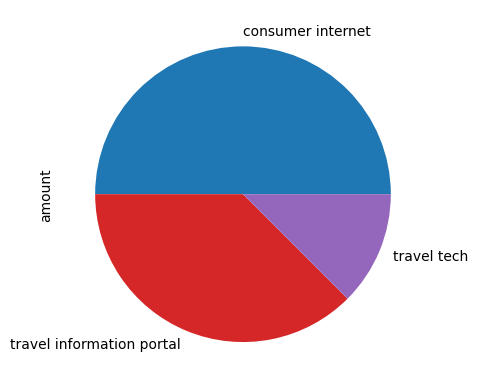

In [168]:
df[df['investors'].str.contains('MakeMyTrip')].groupby('vertical')['amount'].sum().plot(kind='pie')

<Axes: ylabel='amount'>

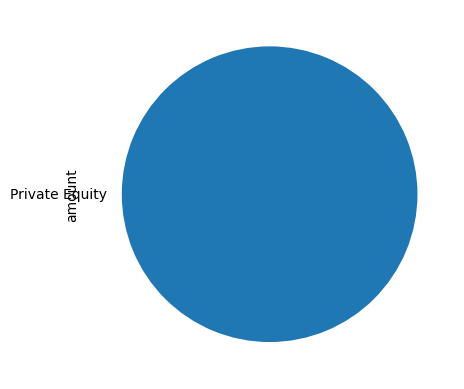

In [173]:
df[df['investors'].str.contains('MakeMyTrip')].groupby('round')['amount'].sum().plot(kind='pie')

### YoY investments

<Axes: xlabel='year'>

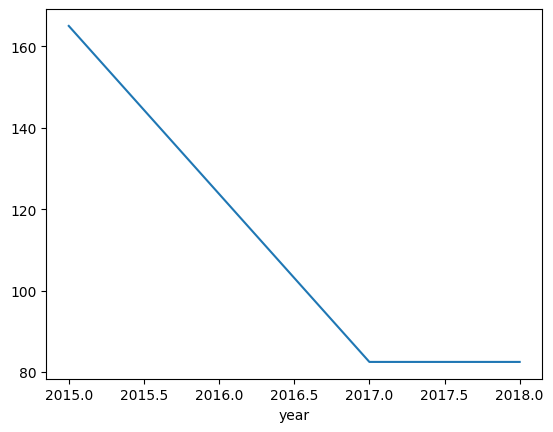

In [174]:
df[df['investors'].str.contains('MakeMyTrip')].groupby('year')['amount'].sum().plot(kind='line')

#### Similar Investors

In [340]:
selected_vertical = df[df['investors'].str.contains('Makemytrip')]['vertical'].mode(0).values[0]
selected_subvertical = df[df['investors'].str.contains('Makemytrip')]['subvertical'].mode(0).values[0]
similar_investors = df[(df['vertical'] == selected_vertical) & (df['subvertical'] == selected_subvertical)]
if similar_investors.size == 0:
    similar_investors = df[(df['vertical'] == selected_vertical) | (df['subvertical'] == selected_subvertical)]
similar_investors.head()
st.subheader(f"Investors similar to {investor} in the {selected_vertical} vertical")
st.write(similar_investors[['investors']].head())

NameError: name 'st' is not defined

# General Analysis

### Total amount

In [176]:
round(df['amount'].sum())

307825

### Max Investment

In [180]:
 df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]

32175.0

### Avg Investments

In [183]:
df['amount'].mean()

102.06415258612401

### Total funded startups

In [188]:
df['startup'].nunique()

2424

### MoM

In [213]:
sum_mom = df.groupby(['year','month'])['amount'].sum().reset_index()
sum_mom['x_axis'] = sum_mom['month'].astype('str') + '-' + sum_mom['year'].astype('str')


In [210]:
count_mom = df.groupby(['year', 'month'])['startup'].count().reset_index()

In [216]:
count_mom['x_axis'] = count_mom['month'].astype('str') + '-' + sum_mom['year'].astype('str')


### Sector wise analysis

<Axes: ylabel='count'>

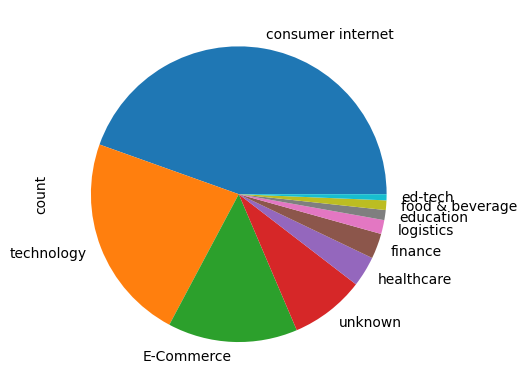

In [219]:
df['vertical'].value_counts().nlargest(10).plot(kind='pie')

<Axes: ylabel='amount'>

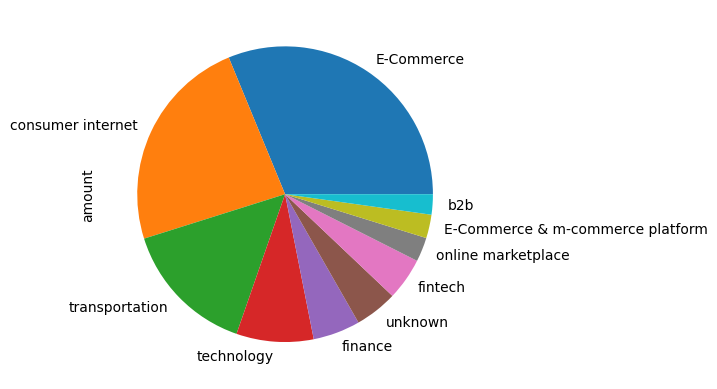

In [222]:
df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='pie')

#### Funding Rounds

<Axes: ylabel='amount'>

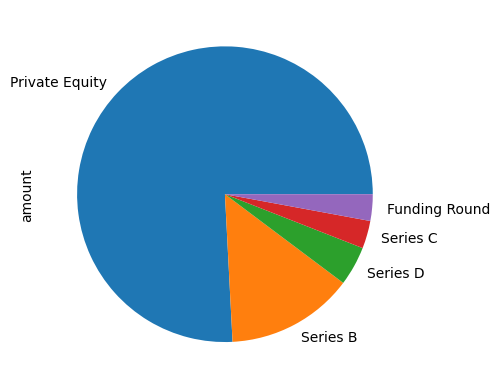

In [228]:
df.groupby('round')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')

#### City wise funding

<Axes: ylabel='count'>

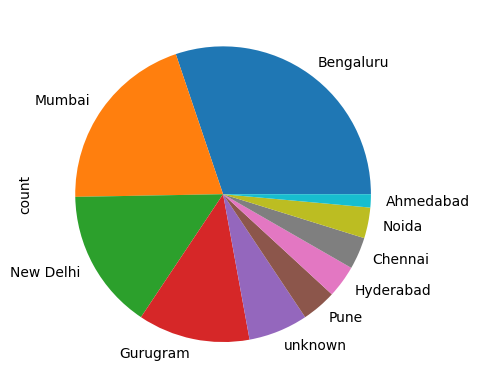

In [229]:
df['city'].value_counts().head(10).plot(kind='pie')

<Axes: ylabel='amount'>

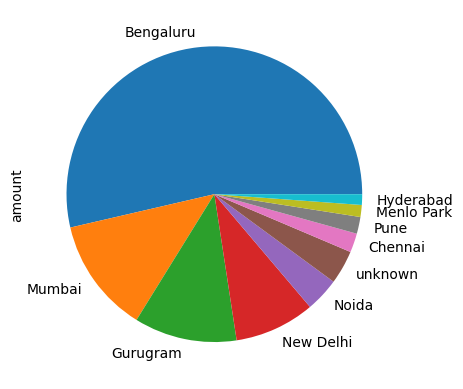

In [232]:
df.groupby(['city'])['amount'].sum().sort_values(ascending=False).head(10).plot(kind='pie')

#### Top startups

In [240]:
temp = df.groupby(['startup', 'year'])['amount'].sum().sort_values(ascending=False).reset_index().drop_duplicates('year', keep='first').sort_values('year', ascending=False)
temp

,startup,year,amount
24,BYJU'S,2020,1650.000
1,Rapido,2019,32175.000
12,Automation Anywhere,2018,2475.000
0,Flipkart,2017,33080.025
27,Snapdeal,2016,1650.000
3,Ola,2015,9528.750


In [246]:
temp['x_axis'] =temp['startup'] + '-' + temp['year'].astype('str')

In [247]:
temp

,startup,year,amount,x_axis
24,BYJU'S,2020,1650.000,BYJU'S-2020
1,Rapido,2019,32175.000,Rapido-2019
12,Automation Anywhere,2018,2475.000,Automation Anywhere-2018
0,Flipkart,2017,33080.025,Flipkart-2017
27,Snapdeal,2016,1650.000,Snapdeal-2016
3,Ola,2015,9528.750,Ola-2015


In [253]:
temp = df.groupby(['investors', 'year'])['amount'].sum().sort_values(ascending=False).reset_index().drop_duplicates('year', keep='first').sort_values('year', ascending=False)
temp

,investors,year,amount
25,Tiger global management,2020,1650.0
0,Westbridge capital,2019,32604.0
14,"Alibaba, Helion venture partners, Bessemer ven...",2018,2475.0
1,Softbank,2017,20625.0
28,Ontario teachers' pension plan & others,2016,1650.0
5,Steadview capital and existing investors,2015,5775.0


In [255]:
temp['x_axis'] =temp['investors'] + '-' + temp['year'].astype('str')

In [257]:
temp['investors'][14]

'Alibaba, Helion venture partners, Bessemer venture partners, Ascent capital'

### Funding Heatmap

In [275]:
heatmap_data = pd.pivot_table(df, columns="year", index="month", values="amount", aggfunc='count')
heatmap_data

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,53.0,104.0,72.0,36.0,3.0,7.0
2,55.0,100.0,48.0,42.0,3.0,NaN
3,60.0,85.0,71.0,34.0,NaN,NaN
4,62.0,79.0,71.0,32.0,14.0,NaN
5,61.0,79.0,67.0,22.0,9.0,NaN
6,85.0,98.0,65.0,32.0,13.0,NaN
7,98.0,63.0,42.0,34.0,13.0,NaN
8,98.0,87.0,45.0,21.0,16.0,NaN
9,87.0,73.0,58.0,12.0,9.0,NaN


<Axes: xlabel='year', ylabel='month'>

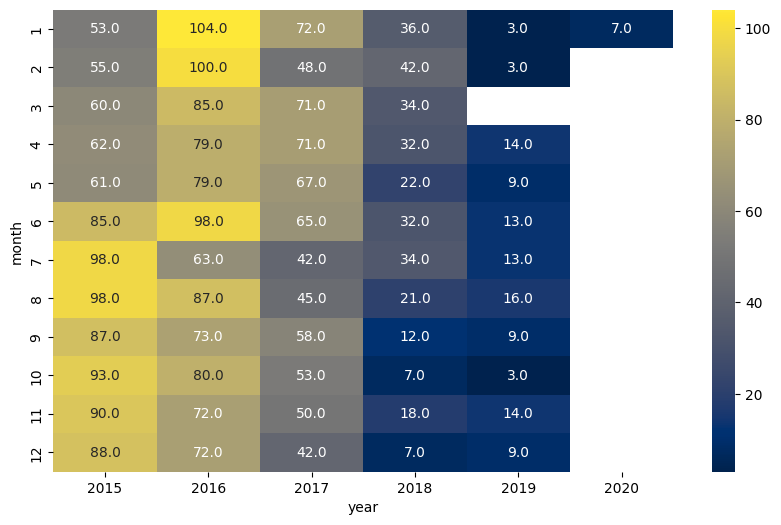

In [276]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="cividis", ax=ax)

# StartUp

#### Industry and SubIndustry

In [285]:
df[df['startup'] == "BYJU'S"]['vertical'].value_counts().index[0]

'consumer internet'

In [284]:
df[df['startup'] == "BYJU'S"]['subvertical'].value_counts().index[0]

'E-learning'

#### Location and Funding Rounds

In [290]:
df[df['startup'] == "BYJU'S"]['city'].value_counts().index[0]

'Bengaluru'

In [293]:
df[df['startup'] == "BYJU'S"]['city'].mode().values[0]

'Bengaluru'

In [296]:
df[df['startup'] == "BYJU'S"]['round'].count()

7

#### Investments

In [313]:
df[df['startup'] == "BYJU'S"][['date', 'investors', 'round', 'amount']]

,date,investors,round,amount
Sr No,,,,
1,2020-01-09,Tiger global management,Private Equity,1650.00
68,2019-07-10,Qatar investment authority,Private Equity,1237.50
713,2017-07-25,Tencent holdings,Private Equity,288.75
984,2017-03-29,Verlinvest,Private Equity,0.00
1165,2016-12-20,International financial corporation,Private Equity,123.75
1357,2016-09-09,"Chan zuckerberg initiative, Times internet ltd...",Private Equity,412.50
1881,2016-03-22,"Sequoia india, Sofina",Private Equity,618.75


#### Similar Startups

In [326]:
selected_startup = "BYJU'S"

selected_vertical = df[df['startup'] == selected_startup]['vertical'].mode(0).values[0]
selected_subvertical = df[df['startup'] == selected_startup]['subvertical'].mode(0).values[0]
similar_startups = df[(df['vertical'] == selected_vertical) & (df['subvertical'] == selected_subvertical)]
if similar_startups.size == 0:
    similar_startups = df[(df['vertical'] == selected_vertical) | (df['subvertical'] == selected_subvertical)]
similar_startups['startup'].head(10)

Sr No
1           BYJU'S
105          Toppr
107      Unacademy
152        Netmeds
154     Daily hunt
156    HappyGoEasy
157          Nykaa
159        Dream11
162      Pharmeasy
167    Samosa Labs
Name: startup, dtype: object

In [325]:
similar_startups.size

0